#### Import the data and get a high-level picture

In [264]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re

In [226]:
df = pd.read_csv('sales.csv')
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,$3.50


In [227]:
df.shape

(29922, 6)

In [230]:
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                 object
quantity               int64
line_total            object
dtype: object

#### TODO: Fix column datatypes

Change ordered_at to datetime

Change price and line_total to float

In [229]:
df["ordered_at"] = pd.to_datetime(df["ordered_at"])

In [231]:
# func to remove $sign, will only work if a string was passed in
def removeDollar(string):
    return string.strip("$")

df["price"]= df["price"].apply(removeDollar).astype(float)
df["line_total"]= df["line_total"].apply(removeDollar).astype(float)

In [232]:
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object

#### TODO: drop if duplicated or null

In [235]:
df[df.duplicated()].shape[0]

531

In [234]:
df = df.dropna()

In [236]:
df.isnull().sum()

order_id      0
name          0
ordered_at    0
price         0
quantity      0
line_total    0
dtype: int64

In [237]:
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total


In [238]:
df.drop_duplicates(keep = False, inplace = True)

In [239]:
df[df.duplicated()].shape[0]

0

In [240]:
df

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:09,3.0,1,3.0
...,...,...,...,...,...,...
29817,19997,"""CONE"" Waffle Cone",2018-07-28 17:40:40,4.0,3,12.0
29818,19997,"""SORBET"" Blood Orange",2018-07-28 17:40:40,2.5,3,7.5
29819,19998,"""SORBET"" Lychee",2018-07-28 18:21:44,3.0,1,3.0
29820,19998,"""ICE CREAM"" Rocky Road",2018-07-28 18:21:44,3.5,1,3.5


#### Sanity check for value ranges and to check assumptions

In [241]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

27

In [242]:
df[df['line_total'] < 0].shape[0]

276

#### TODO: 
Set line_total = price * quantity if different
Remove if line total < 0

In [243]:
df.loc[df['price'] * df['quantity'] != df['line_total'], 'line_total'] = df['price'] * df['quantity']

In [246]:
df.drop(df[df.line_total < 0].index, inplace = True)

In [247]:
df.describe()

,order_id,price,quantity,line_total
count,27105.000000,27105.000000,27105.000000,27105.000000
mean,14995.510238,2.512931,1.999779,5.029183
std,2888.511015,1.058688,0.819353,3.084671
min,10000.000000,0.500000,1.000000,0.500000
25%,12502.000000,1.500000,1.000000,2.500000
50%,14978.000000,2.500000,2.000000,4.500000
75%,17509.000000,3.500000,3.000000,7.500000
max,19999.000000,4.000000,3.000000,12.000000


#### TODO: Get value between "" in name and put it in category column

In [300]:
df['category'] = re.findall('"([^"]*)"', df.name.to_string())

In [205]:
# def removeQuotation(string):
#     return string[string.find('"')+1 : string.find('"')]

# df["name"].astype(str).apply(removeQuotation)

In [248]:
# df['name'].str.split('"')

In [301]:
df.head()

,level_0,index,order_id,name,ordered_at,price,quantity,line_total,category
0,0,0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5,ICE CREAM
1,1,1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5,ICE CREAM
2,2,2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0,SORBET
3,3,4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5,CONE
4,4,5,10002,"""SORBET"" Lychee",2018-01-01 12:23:09,3.0,1,3.0,SORBET


#### Analysis, finally!

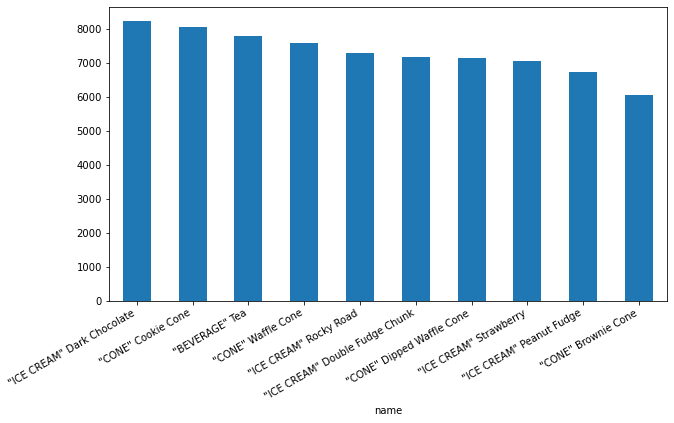

In [295]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()